In [6]:
from imagegrains import segmentation_helper, data_loader, plotting
import torch
import matplotlib.pyplot as plt

## Download pre-trained models and demo data  
If you have not donwloaded the pre-trained models and demo data yet from github, please run the following cell to download them.

In [7]:
download_path = data_loader.download_files()
print("Files saved to: ", download_path)

Files saved to:  C:/Users/Mair/imagegrains


Instead of using the demo files, you can use your own files. To do so, please change the paths in the following cell to your own files.

In [8]:
data_path = "F:/cellpose/fh/" # path to dataset

To use the demo files, please run the following cell.

In [9]:
data_path = f'{download_path}/demo_data/FH/'

### Check local GPU setup  
If you have a GPU, you can run the following cell to check if it is properly set up. Pleasse make sure to follow the instructions for correct installation in the [README](https://github.com/dmair1989/imagegrains#local-installation) to enable GPU support. If you work on a Mac you can try to install the Cellpose package with experimental M1 support (see [here](https://cellpose.readthedocs.io/en/latest/installation.html#m1-mac-installation)).

In [10]:
# List GPU devices and CUDA version
!nvidia-smi -L 
!nvcc --version
# Check GPU memory
!nvidia-smi -q -d Memory 

GPU 0: Quadro K620 (UUID: GPU-56f68e08-f805-3d86-6424-838f274f41a2)
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0



==============NVSMI LOG==============

Timestamp                                 : Thu Jun 15 14:12:44 2023
Driver Version                            : 522.06
CUDA Version                              : 11.8

Attached GPUs                             : 1
GPU 00000000:01:00.0
    FB Memory Usage
        Total                             : 2048 MiB
        Reserved                          : 40 MiB
        Used                              : 1583 MiB
        Free                              : 424 MiB
    BAR1 Memory Usage
        Total                             : 256 MiB
        Used                              : 1 MiB
        Free                              : 255 MiB



In [11]:
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available for pytorch: {torch.cuda.is_available()}")

PyTorch version: 2.0.1+cu117
GPU available for pytorch: True


### Find files

In [12]:
train_images,train_masks,test_images,test_masks = data_loader.find_data(data_path)

### (Optional) Ensure correct names

In [13]:
segmentation_helper.check_labels(train_masks);
segmentation_helper.check_labels(test_masks);
segmentation_helper.check_im_label_pairs(train_images,train_masks);
segmentation_helper.check_im_label_pairs(test_images,test_masks);

No files renamed.
No files renamed.
All images have labels.
All images have labels.


### Visual data check

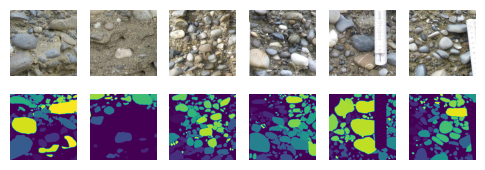

In [14]:
plt.figure(figsize=(len(train_images),2))
plotting.show_training_set(train_images)

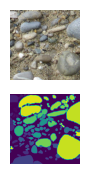

In [16]:
plt.figure(figsize=(len(test_images),2))
plotting.show_training_set(test_images)

## Configuration for console training  

You can either train the model in the console or in the notebook. For console training you can simply copy the `train_str` (i.e., the outpt of the next cell) and paste it into the console. Make sure you are in an `imagegrains` or `cellpose` conda environment. Alternatively, you can run the after the next ( `!{train_str}` ) the model in the notebook via the console.

Details on training options can be found here:  
https://cellpose.readthedocs.io/en/latest/train.html   
https://cellpose.readthedocs.io/en/latest/api.html#cellpose.models.CellposeModel.train


In [17]:
model_path = "F:/demo/train/" #or 'nuclei'

train_path = "F:/demo/train/"
test_path = "F:/demo/test/"

Channel_to_use_for_segmentation = "Grayscale" #@param ["Grayscale", "Blue", "Green", "Red"]
# @markdown If you have a secondary channel that can be used, for instance nuclei, choose it here:
Second_segmentation_channel= "None" #@param ["None", "Blue", "Green", "Red"]

# Here we match the channel to number
if Channel_to_use_for_segmentation == "Grayscale":
  chan = 0
elif Channel_to_use_for_segmentation == "Blue":
  chan = 3
elif Channel_to_use_for_segmentation == "Green":
  chan = 2
elif Channel_to_use_for_segmentation == "Red":
  chan = 1

if Second_segmentation_channel == "Blue":
  chan2 = 3
elif Second_segmentation_channel == "Green":
  chan2 = 2
elif Second_segmentation_channel == "Red":
  chan2 = 1
elif Second_segmentation_channel == "None":
  chan2 = 0

diameter =  0#@param {type:"number"}

mask_filter = '_mask'

augment = True
#@markdown threshold on flow error to accept a mask (set higher to get more cells, e.g. in range from (0.1, 3.0), OR set to 0.0 to turn off so no cells discarded):
flow_threshold = 0.4 #@param {type:"slider", min:0.0, max:3.0, step:0.1}
#@markdown threshold on cellprob output to seed cell masks (set lower to include more pixels or higher to include fewer, e.g. in range from (-6, 6)):
cellprob_threshold=0 #@param {type:"slider", min:-6, max:6, step:1}

train_str = f'python -m cellpose --use_gpu --verbose --train --dir {train_path} --test_dir {train_path} --chan 0 --chan2 0 --pretrained_model {model_path} --mask_filter {mask_filter}'
print(train_str)

python -m cellpose --use_gpu --verbose --train --dir F:/demo/train/ --test_dir F:/demo/train/ --chan 0 --chan2 0 --pretrained_model F:/demo/train/ --mask_filter _mask


In [ ]:
#train via console
!{train_str}

## Custom training  
Alternatively, you can train a cellpose model with custom parameters. 

Parameters:
------------
`PATH` (str) - Path to the directory containing the images and labels
`pretrained_model` (str(optional, default None)) - Path to the pretrained model. If not specified, the model is trained from scratch.
`datstring` (str(optional, default None)) - String to be added to the model name. 
`return_model` (bool(optional, default False)) - If True, the model is returned
`model_name` (str(optional, default None)) - Name of the model.
`label_check` (bool(optional, default True)) - If True, the labels are checked for the correct format and the images and labels are checked for correct pairing. If the labels are not in the correct format, they are renamed to the correct format. If the images and labels are not paired correctly, a list of images for which the labels are missing is returned.

more parameters:   
https://cellpose.readthedocs.io/en/latest/api.html#cellpose.models.CellposeModel.train 

In [ ]:
segmentation_helper.custom_train(data_path, gpu=True,pretrained_model='nuclei', batch_size=1, rescale=False)